##  Midwest Traffic Accidents Exploratory Visual Analysis

### Contents
01 Import Libraries and Data

02 Data Check and Preparation

03 Correlations

04 Scatterplot

05 Pair Plot

06 Categorical Plot

07 Questions

08 Potential Hypotheses

### 01 Import Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Create path variable for main project folder
path = r'D:\JupyterProjects\09-2022 Midwest Accidents Analysis'

In [3]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'MidwestClean.csv'), index_col = False)

In [4]:
# Display charts in notebook
%matplotlib inline

### 02 Data Check and Preparation

In [5]:
df.shape

(279223, 20)

In [6]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,State,Temperature(F),Pressure(in),Visibility(mi),Weather_Condition,Year,Date,Day,Month,Day_of_Week,Hour,Weekday,Weekend,State_Accidents
0,3,40.108910,-83.092860,3.230,R,Dublin,OH,42.1,29.76,10.0,Rain,2016,2016-02-08,8,2,0,0,1.0,0.0,23725
1,2,39.865420,-84.062800,0.747,R,Dayton,OH,36.9,29.68,10.0,Rain,2016,2016-02-08,8,2,0,5,1.0,0.0,23725
2,2,39.102660,-84.524680,0.055,R,Cincinnati,OH,36.0,29.70,10.0,Cloudy/Overcast,2016,2016-02-08,8,2,0,6,1.0,0.0,23725
3,2,41.062130,-81.537840,0.123,R,Akron,OH,39.0,29.65,10.0,Cloudy/Overcast,2016,2016-02-08,8,2,0,6,1.0,0.0,23725
4,3,39.172393,-84.492792,0.500,R,Cincinnati,OH,37.0,29.69,10.0,Rain,2016,2016-02-08,8,2,0,7,1.0,0.0,23725


In [7]:
# Check for null values 
df.isnull().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Side                 0
City                 8
State                0
Temperature(F)       0
Pressure(in)         0
Visibility(mi)       0
Weather_Condition    0
Year                 0
Date                 0
Day                  0
Month                0
Day_of_Week          0
Hour                 0
Weekday              0
Weekend              0
State_Accidents      0
dtype: int64

In [8]:
# Replace null 'City' values with 'Unknown'
df.fillna('Unknown', inplace=True)

In [9]:
df.isnull().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Side                 0
City                 0
State                0
Temperature(F)       0
Pressure(in)         0
Visibility(mi)       0
Weather_Condition    0
Year                 0
Date                 0
Day                  0
Month                0
Day_of_Week          0
Hour                 0
Weekday              0
Weekend              0
State_Accidents      0
dtype: int64

In [10]:
df.head(10)

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,State,Temperature(F),Pressure(in),Visibility(mi),Weather_Condition,Year,Date,Day,Month,Day_of_Week,Hour,Weekday,Weekend,State_Accidents
0,3,40.108910,-83.092860,3.230,R,Dublin,OH,42.1,29.76,10.0,Rain,2016,2016-02-08,8,2,0,0,1.0,0.0,23725
1,2,39.865420,-84.062800,0.747,R,Dayton,OH,36.9,29.68,10.0,Rain,2016,2016-02-08,8,2,0,5,1.0,0.0,23725
2,2,39.102660,-84.524680,0.055,R,Cincinnati,OH,36.0,29.70,10.0,Cloudy/Overcast,2016,2016-02-08,8,2,0,6,1.0,0.0,23725
3,2,41.062130,-81.537840,0.123,R,Akron,OH,39.0,29.65,10.0,Cloudy/Overcast,2016,2016-02-08,8,2,0,6,1.0,0.0,23725
4,3,39.172393,-84.492792,0.500,R,Cincinnati,OH,37.0,29.69,10.0,Rain,2016,2016-02-08,8,2,0,7,1.0,0.0,23725
5,2,39.063240,-84.032430,1.427,R,Williamsburg,OH,35.6,29.66,10.0,Cloudy/Overcast,2016,2016-02-08,8,2,0,8,1.0,0.0,23725
6,2,39.775650,-84.186030,0.227,R,Dayton,OH,33.8,29.63,3.0,Cloudy/Overcast,2016,2016-02-08,8,2,0,8,1.0,0.0,23725
7,2,41.375310,-81.820170,0.521,R,Cleveland,OH,33.1,29.63,0.5,Snow,2016,2016-02-08,8,2,0,11,1.0,0.0,23725
8,2,40.702247,-84.075887,0.491,R,Lima,OH,39.0,29.59,10.0,Cloudy/Overcast,2016,2016-02-08,8,2,0,14,1.0,0.0,23725
9,2,40.109310,-82.968490,0.826,R,Westerville,OH,32.0,29.59,0.5,Snow,2016,2016-02-08,8,2,0,15,1.0,0.0,23725


### 03 Correlations

In [11]:
df.shape

(279223, 20)

In [12]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,State,Temperature(F),Pressure(in),Visibility(mi),Weather_Condition,Year,Date,Day,Month,Day_of_Week,Hour,Weekday,Weekend,State_Accidents
0,3,40.108910,-83.092860,3.230,R,Dublin,OH,42.1,29.76,10.0,Rain,2016,2016-02-08,8,2,0,0,1.0,0.0,23725
1,2,39.865420,-84.062800,0.747,R,Dayton,OH,36.9,29.68,10.0,Rain,2016,2016-02-08,8,2,0,5,1.0,0.0,23725
2,2,39.102660,-84.524680,0.055,R,Cincinnati,OH,36.0,29.70,10.0,Cloudy/Overcast,2016,2016-02-08,8,2,0,6,1.0,0.0,23725
3,2,41.062130,-81.537840,0.123,R,Akron,OH,39.0,29.65,10.0,Cloudy/Overcast,2016,2016-02-08,8,2,0,6,1.0,0.0,23725
4,3,39.172393,-84.492792,0.500,R,Cincinnati,OH,37.0,29.69,10.0,Rain,2016,2016-02-08,8,2,0,7,1.0,0.0,23725


In [13]:
# Create a subset excluding date variables
sub = df[['Severity','Distance(mi)','Temperature(F)', 'Pressure(in)', 'Visibility(mi)','Weekday', 'Weekend', 'State_Accidents']]

In [14]:
# Create a correlation matrix using pandas
sub.corr()

,Severity,Distance(mi),Temperature(F),Pressure(in),Visibility(mi),Weekday,Weekend,State_Accidents
Severity,1.000000,0.068398,0.089068,0.309659,0.022516,-0.006416,0.006416,-0.247957
Distance(mi),0.068398,1.000000,-0.023273,-0.016678,-0.041882,-0.013239,0.013239,-0.066927
Temperature(F),0.089068,-0.023273,1.000000,0.010307,0.278980,0.039173,-0.039173,-0.270193
Pressure(in),0.309659,-0.016678,0.010307,1.000000,0.099949,0.138330,-0.138330,-0.311513
Visibility(mi),0.022516,-0.041882,0.278980,0.099949,1.000000,0.039644,-0.039644,-0.092758
Weekday,-0.006416,-0.013239,0.039173,0.138330,0.039644,1.000000,-1.000000,-0.078952
Weekend,0.006416,0.013239,-0.039173,-0.138330,-0.039644,-1.000000,1.000000,0.078952
State_Accidents,-0.247957,-0.066927,-0.270193,-0.311513,-0.092758,-0.078952,0.078952,1.000000


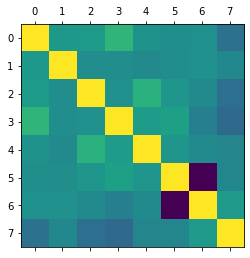

In [15]:
# Create a correlation heatmap using matplotlib
plt.matshow(sub.corr())
plt.show()

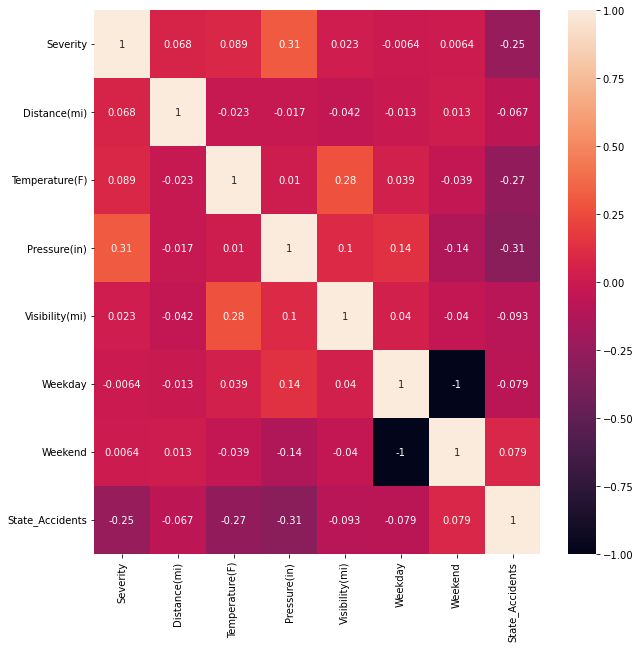

In [16]:
# Create a subplot with matplotlib
fig, ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

 - Coefficient of -0.25 for 'Severity' and 'State_Accidents' indicates a weak, negative correlation.
 - Coefficient of -0.27 for 'Temperature(F)' and 'State_Accidents' indicates a weak, negative correlation.
 - Coefficient of -0.31 for 'Pressure(in)' and 'State_Accidents' indicates a weak, negative correlation.
 - Coefficient of 0.28 for 'Temperature(F)' and 'Visibility(mi)' indicates a weak, positive correlation.
 - Coefficient of 0.31 for 'Pressure(in)' and 'Severity' indicates a moderate, positive correlation.

### 04 Scatterplot

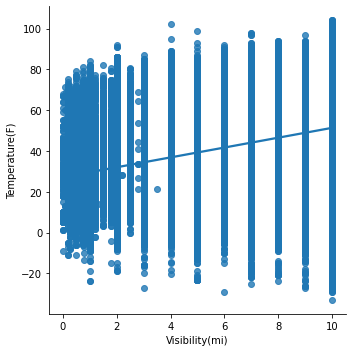

In [17]:
# Create a seaborn scatterplot for the 'Visibility(mi)' and 'Temperature(F)' columns

sns.lmplot(x = 'Visibility(mi)', y = 'Temperature(F)', data = df)

The weak, positive correlation between 'Temperature(F)' and 'Visibility(mi)' can be seen in the above scatterplot with clustering at the lower end of both ranges.

### 05 Pair Plot

In [18]:
# Create subset of variables for pair plot
sub_2 = df[['Temperature(F)', 'Visibility(mi)', 'Pressure(in)', 'Severity', 'State_Accidents', 'Hour', 'Day_of_Week']]

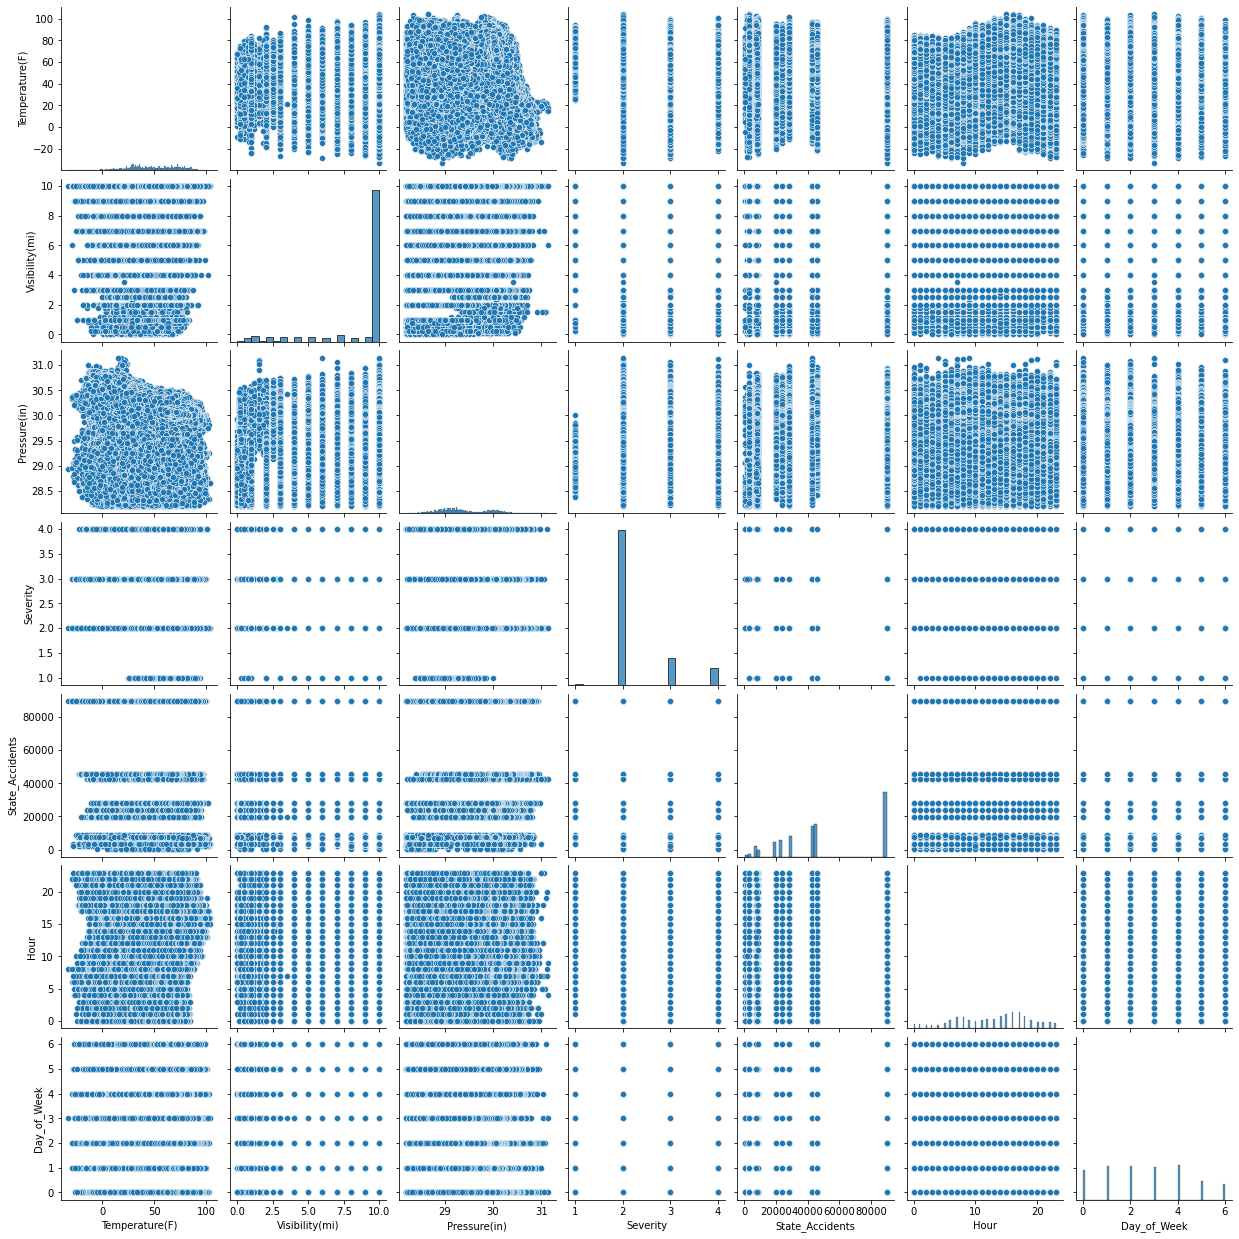

In [19]:
 # Create seaborn pair plot
sns.pairplot(sub_2)

Severity is mostly valued at 2 with a small percentage of 4s and evenly distributed between the day of week and hour of day.  Need to further investigate the distribution of accidents by hour of day and day of week.  There appear to more accidents during the evening rush hour and on Fridays (day 5). 

### 06 Categorical Plot

<AxesSubplot:xlabel='Hour', ylabel='Count'>

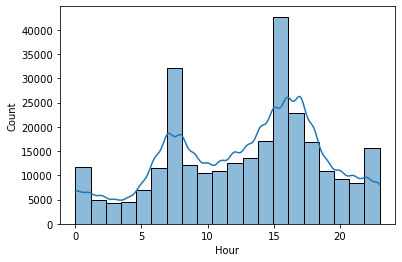

In [20]:
# Visualize distribution of 'Hour'
sns.histplot(df['Hour'], bins = 20, kde = True)

<AxesSubplot:xlabel='Weekday', ylabel='Count'>

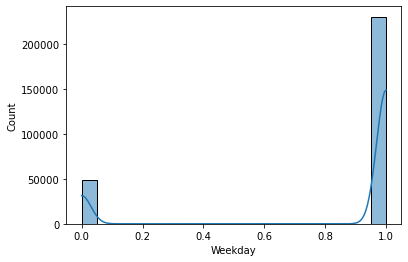

In [21]:
# Visualize distribution of 'Day_of_Week'
sns.histplot(df['Weekday'], bins = 20, kde = True)

In [22]:
# Create 'Day Category' for weekday vs. weekend.  Weekdays, Monday - Friday, in pandas are 0-4; 
# weekends are 5-6.
df.loc[(df['Day_of_Week'] >= 0) & (df['Day_of_Week'] < 5), 'Day Category'] = 'Weekday'

In [23]:
df.loc[(df['Day_of_Week'] >= 5) & (df['Day_of_Week'] <= 6), 'Day Category'] = 'Weekend'

In [24]:
# Verify that all records were assigned a value
df['Day Category'].value_counts(dropna = False)

Weekday    230634
Weekend     48589
Name: Day Category, dtype: int64

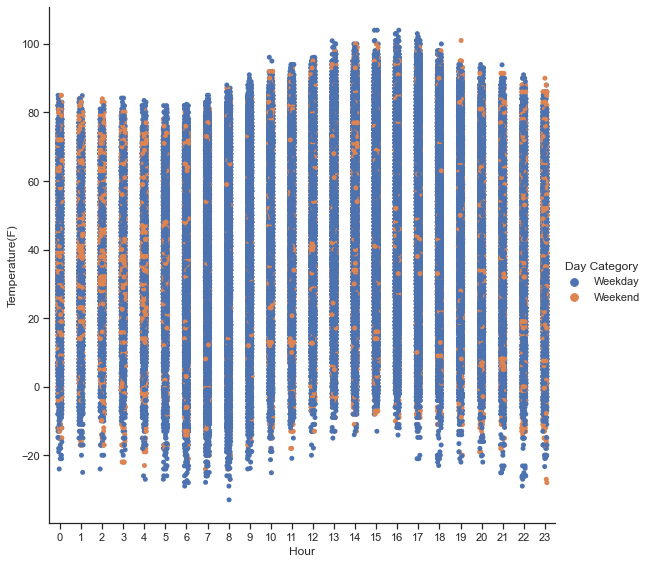

In [25]:
# Create a categorical plot in seaborn using the Day Category created above
sns.set(style='ticks')
g = sns.catplot(x='Hour', y='Temperature(F)', hue='Day Category', data=df, height=8)

There is some variation between weekday and weekend accidents depending on the hour of the day and temperature.

### 07 Questions

Accidents appear most likely to occur when people are commuting to and from work, especially on Fridays. 
- Do weather conditions impact the number of accidents?
- Are there more accidents around major holidays such as New Year's Day and the 4th of July?
- Do hour of day patterns differ between weekdays and weekends?
- What cities and states have the most accidents?

### 08 Hypotheses

 - Accidents are most likely to occur on Fridays between 3-5pm.
 - Accidents are more likely to occur when more drivers are on the road.
 - Fair weather accidents exceed accidents in poor weather conditions.

In [26]:
# Export updated data
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'MidwestCleanUpdated.csv'), index=False)